In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
Tourism = pd.read_csv("tourism_resource_dataset.csv")
# https://www.kaggle.com/datasets/ziya07/tourism-resource-management-dataset?resource=download

## Data Overview

In [9]:
Tourism.head()

,timestamp,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2024-12-01 00:00:00,LOC_003,808,0.907638,19.368864,127,51.506727,summer,0,5.502615,1,0.857819,high,-4.576337,0.582736
1,2024-12-01 01:00:00,LOC_001,948,0.974266,17.404945,37,55.901717,autumn,0,4.736401,0,0.961133,high,-28.314085,20.022820
2,2024-12-01 02:00:00,LOC_003,292,0.321912,16.366819,113,68.533024,winter,1,2.522827,0,0.306956,low,1.329948,5.881103
3,2024-12-01 03:00:00,LOC_003,592,0.811889,20.266316,52,85.301039,autumn,1,2.687745,1,0.701945,medium,-11.921675,20.376535
4,2024-12-01 04:00:00,LOC_001,89,0.936667,15.922471,145,52.258779,summer,1,1.094965,1,0.512834,medium,-6.068825,-4.793058


In [11]:
# Check for missing values
Tourism.isnull().sum()

timestamp               0
location_id             0
visitor_count           0
resource_usage_rate     0
temperature             0
air_quality_index       0
noise_level             0
season                  0
peak_hour_flag          0
visitor_satisfaction    0
sensor_noise_flag       0
resource_prediction     0
resource_allocation     0
t_sne_dim1              0
t_sne_dim2              0
dtype: int64

In [17]:
# Check dimension of dataset
rows = len(Tourism.index)
columns = len(Tourism.columns)
print("There are", rows, "rows and", columns, "columns")

There are 1000 rows and 15 columns


In [18]:
# Check column data types
Tourism.dtypes

timestamp                object
location_id              object
visitor_count             int64
resource_usage_rate     float64
temperature             float64
air_quality_index         int64
noise_level             float64
season                   object
peak_hour_flag            int64
visitor_satisfaction    float64
sensor_noise_flag         int64
resource_prediction     float64
resource_allocation      object
t_sne_dim1              float64
t_sne_dim2              float64
dtype: object

## Data Exploration

In [49]:
popularity = Tourism.groupby('location_id')['visitor_count'].mean()

In [52]:
popularity_satisfaction = Tourism.groupby('location_id')['visitor_satisfaction'].mean()

In [34]:
popularity_temp = Tourism.groupby('location_id')['temperature'].mean()

In [54]:
print(popularity, popularity_satisfaction, popularity_temp) # low variability between locations however location 1 and 2 can be examined further

location_id
LOC_001    532.442254
LOC_002    507.880368
LOC_003    508.507837
Name: visitor_count, dtype: float64 location_id
LOC_001    5.567015
LOC_002    5.740517
LOC_003    5.354339
Name: visitor_satisfaction, dtype: float64 location_id
LOC_001    24.994912
LOC_002    25.081392
LOC_003    25.490467
Name: temperature, dtype: float64


In [26]:
Tourism.groupby('season')['temperature'].mean()

season
autumn    25.091234
spring    25.556342
summer    25.066713
winter    25.007658
Name: temperature, dtype: float64

In [66]:
seasons_count = Tourism.groupby('season')['visitor_count'].mean() # worthy to plot, autumn highest
seasons_count

season
autumn    538.651452
spring    491.956349
summer    509.933594
winter    527.764940
Name: visitor_count, dtype: float64

In [65]:
seasons_satisfaction = Tourism.groupby('season')['visitor_satisfaction'].mean() # worthy to plot, autumn highest
seasons_satisfaction

season
autumn    5.760195
spring    5.594448
summer    5.408456
winter    5.470759
Name: visitor_satisfaction, dtype: float64

In [41]:
# Check for range of air quality index and noise quality to assess environmental factors
Tourism.describe()

,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,t_sne_dim1,t_sne_dim2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,516.800000,0.647452,25.181186,86.485000,64.028052,0.511000,5.555733,0.467000,0.582126,-0.477890,-0.422334
std,281.178718,0.199183,5.758527,37.615166,19.916098,0.500129,2.554291,0.499159,0.174560,17.179542,15.797633
min,50.000000,0.300132,15.008856,20.000000,30.013057,0.000000,1.014411,0.000000,0.184301,-34.308690,-38.914820
25%,274.000000,0.469661,20.231001,53.000000,46.979884,0.000000,3.468966,0.000000,0.462370,-13.762012,-12.932375
50%,510.000000,0.652413,25.449839,87.000000,63.456537,1.000000,5.599099,0.000000,0.576830,-0.444045,0.167176
75%,762.250000,0.818292,30.240147,120.000000,81.232047,1.000000,7.725748,1.000000,0.701947,12.986121,12.436126
max,999.000000,0.997955,34.994276,149.000000,99.826269,1.000000,9.997764,1.000000,0.976715,36.515007,33.652870


In [63]:
air = np.linspace(20, 149, 3)
noise = np.linspace(30, 100, 3)

In [64]:
air_quality_cut = pd.cut(Tourism['air_quality_index'], air)
noise_level_cut = pd.cut(Tourism['noise_level'], noise)                   
Tourism.pivot_table('visitor_satisfaction', index = [air_quality_cut, noise_level_cut] , columns = 'season')

/var/folders/f4/frv2pdr135g8wmbzx07hc43m0000gn/T/ipykernel_27841/1324569396.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Tourism.pivot_table('visitor_satisfaction', index = [air_quality_cut, noise_level_cut] , columns = 'season')


season                             autumn    spring    summer    winter
air_quality_index noise_level                                          
(20.0, 84.5]      (30.0, 65.0]   5.354646  6.590895  5.769604  5.317673
                  (65.0, 100.0]  5.633755  5.542208  5.131615  5.485842
(84.5, 149.0]     (30.0, 65.0]   5.875185  5.328196  5.288314  5.406094
                  (65.0, 100.0]  6.117802  5.125987  5.396120  5.695681

In [90]:
# Check each location's resource usage rate
resource_location = Tourism.groupby('location_id')['resource_usage_rate'].mean()
resource_location

location_id
LOC_001    0.653160
LOC_002    0.637687
LOC_003    0.651080
Name: resource_usage_rate, dtype: float64

## Data Visualization

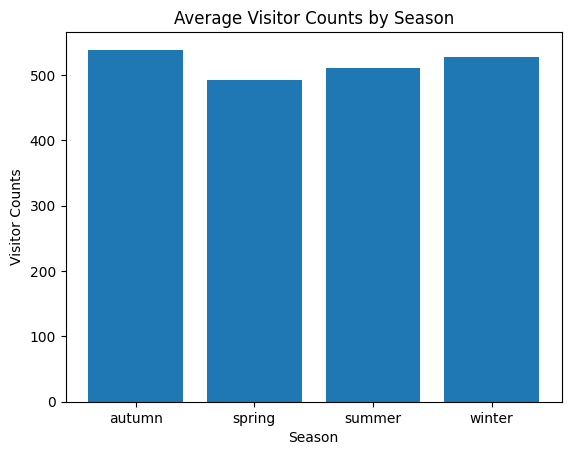

In [93]:
fig, ax = plt.subplots()
ax.bar(seasons_count.index, seasons_count)
ax.set(xlabel = 'Season', ylabel = 'Visitor Counts', title = 'Average Visitor Counts by Season')
plt.show()

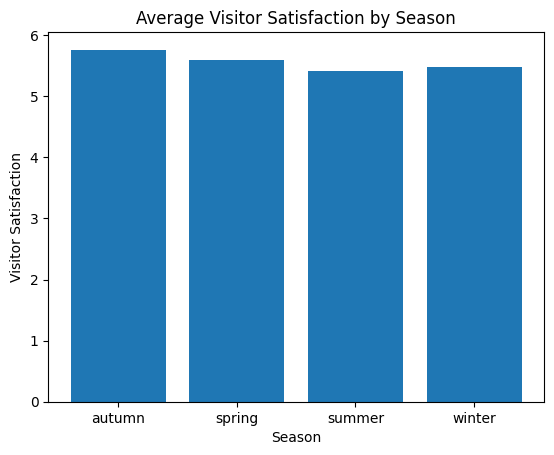

In [92]:
fig, ax = plt.subplots()
ax.bar(seasons_satisfaction.index, seasons_satisfaction)
ax.set(xlabel = 'Season', ylabel = 'Visitor Satisfaction', title = 'Average Visitor Satisfaction by Season')
plt.show()

In [94]:
# Visualize impact of resource usage and saisfaction for each location

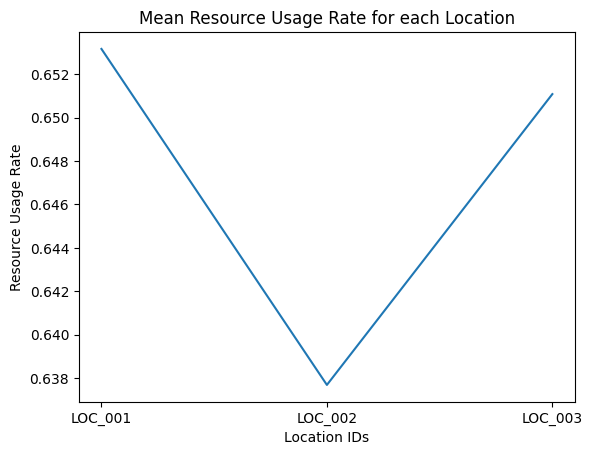

In [98]:
fig, ax = plt.subplots()
ax.plot(resource)
ax.set(xlabel = 'Location IDs', ylabel = 'Resource Usage Rate', title = 'Mean Resource Usage Rate for each Location')
plt.show()

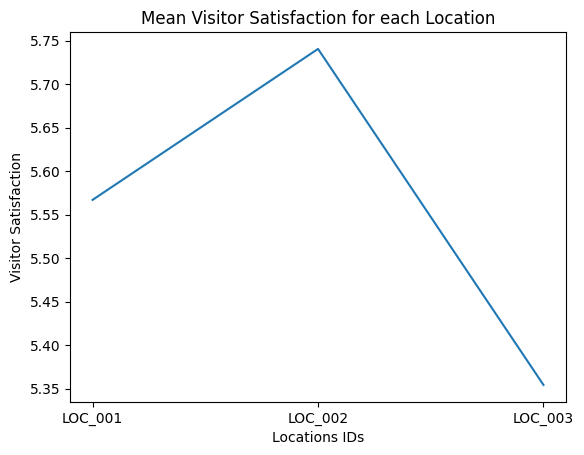

In [99]:
fig, ax = plt.subplots()
ax.plot(popularity_satisfaction)
ax.set(xlabel = 'Locations IDs', ylabel = 'Visitor Satisfaction', title = 'Mean Visitor Satisfaction for each Location')
plt.show()